Found 3 CSV files.
Summed spectra saved to 'N2O_CH4_CO_spectra_triple.csv'


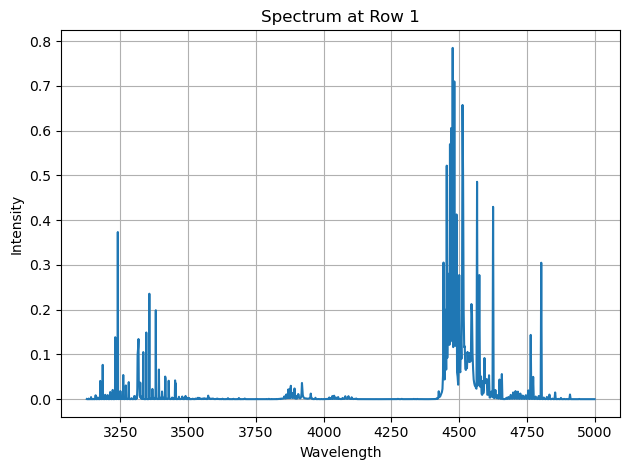

In [11]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# Set the folder containing the CSV files
folder_path = 'spectral_mixing_bowl'  # Replace with your actual folder path

# Get all CSV files in the folder
csv_files = sorted(glob.glob(os.path.join(folder_path, '*.csv')))
print(f"Found {len(csv_files)} CSV files.")

if not csv_files:
    raise FileNotFoundError("No CSV files found in the specified folder.")

# Load all CSVs, skipping the left-most column (assumed to be an index)
dfs = [pd.read_csv(f).iloc[:, 1:] for f in csv_files]

# Validate shape consistency
shape_0 = dfs[0].shape
if not all(df.shape == shape_0 for df in dfs):
    raise ValueError("All CSV files must have the same shape (rows and columns).")

# Element-wise addition by position
df_sum = dfs[0].copy()
for df in dfs[1:]:
    df_sum += df

# Save the result without index
output_path = os.path.join('N2O_CH4_CO_spectra_triple.csv')
df_sum.to_csv(output_path, index=False)

print(f"Summed spectra saved to '{output_path}'")

# OPTIONAL: Plot the nth row (spectrum)
n = 1  # Change this to the row number you want (1-based)
row_index = n - 1
if row_index >= 0 and row_index < df_sum.shape[0]:
    plt.plot(df_sum.columns.astype(float), df_sum.iloc[row_index])
    plt.title(f"Spectrum at Row {n}")
    plt.xlabel("Wavelength")
    plt.ylabel("Intensity")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"Row {n} is out of bounds.")
